<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/GEN_BUS_740_Week_6_Assignment_Real_World_Challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GB 740 — Assignment 5

## Question 1 (No Coding)

Food scientists at Nestle have developed a new snack, Yumm-MPF,  with minimally processed food (“MPF”). They think that if people eat it instead of a regular snack product with ultra processed food (“UPF”), they will eventually have lower blood pressure and blood sugar. This will really help Nestle to market its products. Nestle has had trouble selling minimally processed food because it does not taste as good as ultraprocessed food.

#### 1.A.

They propose an experiment. They will recruit households with two or more members to participate, and then within each household, they will randomly assign one member to eat only Yumm-MPF for their snacks, and assign another member to snack on their usual snacks.

They realize that individual random assignment is **not a good idea** for this experiment. Explain why.

The most obvious issue here would be the potential for interference/spillovers between the test and control group. Since members from both groups live together, nothing is stopping either party from trying each other's snacks. Given that Nestle is trying to see if their new MPF snack can lower someone's blood sugar and blood pressure after consuming it for some period of time instead of their usual snacks, the potential for both the test and control group to be eating both thwarts the ability to confidently measure such an effect.  

#### 1.B.

Realizing the problem with the experiment, they try a different one. They will randomly assign households to UPF or MPF snacks. Then they’ll ask households to report what they ate, and after three months, they’ll measure blood pressure and blood sugar.  

Consider all of the challenges we’ve discussed in class. What one(s) seem most important here?

Some of the more apparent challenges for this specific design would be the risk of non-compliance and or attrition.

Non-Compliance can occur if household(s) in the treatment group decides to keep eating their usual UPF snacks after either trying the MPF snack and not liking it, or never bothering to try the snack at all (since there is nothing stopping them from doing so). This would need to handled through a TOT calculation, where the denominator would account for the proportion of those that were assigned to treatment that followed through with treatment. A high non-compliance rate, however, would lead to less accurate treatment effect calculations.

Attrition could be an issue here given that it could be difficult to get blood pressure readings on some of the treated 3 months into the future. Having people eat snacks is one thing, but convincing them to come in for blood pressure measurements 3 months later is another.... Enhancements would need to be done in terms of following up with the experimental subjects, possibly through measurements done sooner and more frequently (say, 1 reading per month for 3 months). Doing so would more than likely allow us to collect more data from a larger portion of the test group, even if some fall off after say, the 1 month point. Payment, or some type of compensation to come in and get measurements done could also be a solution to help mitigate attrition.



## Question 2 (No Coding)

A professor wants his students to do well on the exam, and he thinks that an extra review session would help. He’s not sure, so he devises an experiment. He emails half the class (selected at random) and encourage them to come to the study session. He then collects data on who comes to the study session, and their exam score.  The data work out as follows:

| Group                 | % Attended study session | Average exam score |
|------------------------|--------------------------|--------------------|
| Attended study session | 1                        | 83                 |
| Did not attend         | 0                        | 84                 |
| Emailed to attend      | 0.8                      | 85                 |
| Not emailed to attend  | 0.2                      | 82                 |

Calculate the intention-to-treat and the effect of treatment on the treated. Explain in words what each of these mean.

In [ ]:
### ITT
Treatment_Score  = 85
Control_Score = 82

ITT = Treatment_Score - Control_Score

print(f"The ITT is {ITT}")

The ITT is 3


In [ ]:
### TOT
Attended_Diff = 0.8 - 0.2

TOT = ITT / Attended_Diff

print(f"The TOT is {TOT:.16f}")

The TOT is 4.9999999999999991


The intention-to-treat effect is 3, meaning that emailing students to come to a study session increased the average exam score by 3 percentage points, regardless if they showed up to the session.

The effect of treatment on the treated is 4.99, meaning that for students in the test group that: recieved the email to come to the study session AND complied, their average exam score increased by 5 percentage points.

In [ ]:
# run once per session
!pip install linearmodels
from linearmodels import IV2SLS
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 2.4 MB/s eta 0:00:00


## Question 3. Python  

A large retail chain sometimes hosts big in-store promotional events, featuring a DJ and discounts. To boost attendance, the retailer uses text message reminders.  

To measure the effect of these reminders on customer attendance, the retailer ran an experiment. Because it wanted to avoid message spillovers within locations, **randomization was done at the store level**:  
- Half of the stores were assigned to the **treatment group** (sent text reminders).  
- The other half were assigned to the **control group** (no reminders).  

Within each store, customer attendance at the promotional event was recorded.  

The dataset `TextPromoData` contains the following columns:  

- `Store_id`: store identifier or cluster  
- `Treatment`: =1 if the store sent text reminders, =0 otherwise  
- `Attended`: =1 if the customer attended the event  


#### Read in the dataset

In [ ]:
### Read Data
url = 'https://raw.githubusercontent.com/dansacks/gb740/refs/heads/main/text_promo_data.csv'

Message_Data = pd.read_csv(url)

Message_Data.shape

(61730, 4)

In [ ]:
Message_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61730 entries, 0 to 61729
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   store_id     61730 non-null  int64
 1   customer_id  61730 non-null  int64
 2   treatment    61730 non-null  int64
 3   attend       61730 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [ ]:
Message_Data.describe()

,store_id,customer_id,treatment,attend
count,61730.000000,61730.000000,61730.000000,61730.000000
mean,31.686895,30865.500000,0.494006,0.517658
std,17.793393,17820.060396,0.499968,0.499692
min,1.000000,1.000000,0.000000,0.000000
25%,16.000000,15433.250000,0.000000,0.000000
50%,32.000000,30865.500000,0.000000,1.000000
75%,47.000000,46297.750000,1.000000,1.000000
max,62.000000,61730.000000,1.000000,1.000000


In [ ]:
Message_Data.head()

,store_id,customer_id,treatment,attend
0,1,1,1,0
1,2,2,1,0
2,3,3,1,1
3,4,4,1,1
4,5,5,1,1


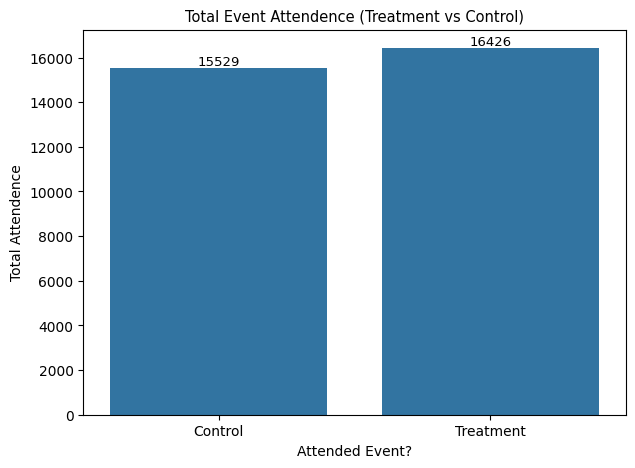

In [ ]:
### Show Attendance numbers between treatment and control
fig, ax = plt.subplots(figsize = (7,5))

y = sns.barplot(
    data = Message_Data,
    x = 'treatment',
    y = 'attend',
    estimator = 'sum',
    errorbar= None
)

plt.xticks([0,1], ['Control','Treatment'])
plt.bar_label(y.containers[0],fontsize = 9.5)

plt.xlabel("Attended Event?")
plt.ylabel("Total Attendence")
plt.title("Total Event Attendence (Treatment vs Control)", fontsize = 10.5)

plt.show()

Relatively even participation between the 2 groups, with slight edge to treatment.

#### 3.A.	Calculate the ATE and 95% CI of the ATE, first not accounting for clustering and then accounting for clustering.

In [ ]:
### Non Clustered
formula_nonclust = 'attend ~ C(treatment)'
model_nonclust = smf.ols(formula = formula_nonclust, data = Message_Data).fit()
modelnonclust_robcov = model_nonclust.get_robustcov_results(cov_type='HC1')

print(modelnonclust_robcov.summary())


                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           5.97e-25
Time:                        07:43:50   Log-Likelihood:                -44711.
No. Observations:               61730   AIC:                         8.943e+04
Df Residuals:                   61728   BIC:                         8.944e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4972      0.00

In [ ]:
### Show ATE
ATE = modelnonclust_robcov.params[1]

print(f"The ATE is: {ATE:.4f}")

The ATE is: 0.0415


In [ ]:
### Show 95% CI
CI = modelnonclust_robcov.conf_int()[1]

print(f"The 95% CI is : {CI}")

The 95% CI is : [0.03360159 0.04935649]


**<u>Interpretation:</u>**

The ATE is 0.0415, which tells us that on average, those who received text reminders (the treatment group) had a 4.15 percentage point increase in attendence over those that did not receieve text reminders (the control group).

The 95% Confidence Interval of the ATE sits at (0.034, 0.049) with a statistically significant p value and a standard error of 0.004.

In [ ]:
### Agg Data to cluster level (store_id)
Clustered_MessageDF = Message_Data.drop(columns = ['customer_id']).groupby('store_id').agg('mean').reset_index()

Clustered_MessageDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store_id   62 non-null     int64  
 1   treatment  62 non-null     float64
 2   attend     62 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [ ]:
Clustered_MessageDF.head()

,store_id,treatment,attend
0,1,1.0,0.356000
1,2,1.0,0.070346
2,3,1.0,0.726514
3,4,1.0,0.474138
4,5,1.0,0.777778


In [ ]:
### Clustered
formula_clust = 'attend ~ C(treatment)'
model_clust = smf.ols(formula = formula_clust, data = Clustered_MessageDF).fit()
modelclust_robcov = model_clust.get_robustcov_results(cov_type='HC1')

print(modelclust_robcov.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3163
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.576
Time:                        07:43:50   Log-Likelihood:                -14.449
No. Observations:                  62   AIC:                             32.90
Df Residuals:                      60   BIC:                             37.15
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4935    

In [ ]:
### Show ATE
ATE_clust = modelclust_robcov.params[1]

print(f"The ATE is: {ATE_clust:.4f}")

The ATE is: 0.0444


In [ ]:
### Show 95% CI
CI_Clust = modelclust_robcov.conf_int()[1]

print(f"The 95% CI is : {CI_Clust}")

The 95% CI is : [-0.11341361  0.2021265 ]


**<u>Interpretation:</u>**

The ATE is 0.0444, which tells us that on average, those who received text reminders (the treatment group) had a 4.44 percentage point increase in attendence over those that did not receieve text reminders (the control group).

The 95% Confidence Interval of the ATE sits at (-0.113, 0.202), which indicates non-statistical significance (includes 0).

#### 3.B.	What can you conclude, after accounting for clustering?

After accounting for clustering, we see that the number of observations dip from over 61k to only 62. We now yield an ATE (0.0444) that isn't statistically significant (Confidence interval contains 0). Due to this, we cannot say with confidence that the effect of the treatment vs that of the control is any different from 0.

#### 3.C.	How would your conclusions differ if you failed to account for  clustering?

If I had failed to account for clustering, I would have gone ahead and said that the experiment yielded a positive, statistically significant ATE and would potentially recommend to scale up the treatment. However, when applying clustering, we now see that the true estimate for the ATE is not statistically significant, so I would actually not recommend this strategy to be implemented to scale.

## Question 4. Python  

This question is meant to give you experience estimating ITT and TOT in Python, and to build your intuition for how the compliance rate affects the estimates and their confidence intervals.  

You have datasets from three experiments, `sb1`, `sb2`, and `sb3`. In each experiment, people were assigned to treatment or not.  

- In experiment 1, people had a \$5 incentive to take up treatment.  
- In experiment 2, the incentive was \$10.  
- In experiment 3, the incentive was \$15.  

Each dataset contains the following variables:  

- `id`  
- `treat` (=1 if assigned to treatment)  
- `takeup` (=1 if took treatment)  
- `outcome` (continuous)  


In [ ]:
#### Read each dataset into dataframe
url1 = "https://raw.githubusercontent.com/dansacks/gb740/refs/heads/main/sb1.csv"
url2 = "https://raw.githubusercontent.com/dansacks/gb740/refs/heads/main/sb2.csv"
url3 = "https://raw.githubusercontent.com/dansacks/gb740/refs/heads/main/sb3.csv"

expr1 = pd.read_csv(url1)
expr2 = pd.read_csv(url2)
expr3 = pd.read_csv(url3)

In [ ]:
print(expr1.info())
print()
print(expr2.info())
print()
print(expr3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       500 non-null    int64  
 1   treat    500 non-null    int64  
 2   takeup   500 non-null    int64  
 3   outcome  500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       500 non-null    int64  
 1   treat    500 non-null    int64  
 2   takeup   500 non-null    int64  
 3   outcome  500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       500 non-null    int64  
 1  

In [ ]:
### sb1
expr1.head()

,id,treat,takeup,outcome
0,1,0,0,-0.314396
1,2,0,0,0.489835
2,3,0,0,0.424399
3,4,0,0,0.066181
4,5,0,0,0.241037


In [ ]:
### sb2
expr2.head()

,id,treat,takeup,outcome
0,1,0,0,-0.147456
1,2,0,0,-0.451961
2,3,0,0,1.015691
3,4,0,0,0.886513
4,5,0,0,0.673346


In [ ]:
### sb3
expr3.head()

,id,treat,takeup,outcome
0,1,0,0,0.176750
1,2,0,0,1.388950
2,3,0,0,-0.271581
3,4,0,0,-0.582541
4,5,0,0,-1.170103


#### 4.A. Calculate the ``compliance rate" in each experiment, i.e. difference in take-up between those assigned to treatment and those assigned to control

In [ ]:
### sb1 compliance rate
test_takeup = expr1.query("treat == 1 and takeup == 1")['takeup'].sum()
total_test = expr1.query("treat == 1")['treat'].sum()
TestTakeupRate = test_takeup/total_test

control_takeup = expr1.query("treat == 0 and takeup == 1")['takeup'].sum()
total_control = expr1.query("treat == 0")['treat'].count()
ControlTakeupRate = control_takeup/total_control

ComplianceRate = TestTakeupRate - ControlTakeupRate

print(f"The Compliance rate for Experiment 1 is: {ComplianceRate * 100:.2f}%")

The Compliance rate for Experiment 1 is: 6.40%


In [ ]:
### sb2 compliance rate
test_takeup = expr2.query("treat == 1 and takeup == 1")['takeup'].sum()
total_test = expr2.query("treat == 1")['treat'].sum()
TestTakeupRate = test_takeup/total_test

control_takeup = expr2.query("treat == 0 and takeup == 1")['takeup'].sum()
total_control = expr2.query("treat == 0")['treat'].count()
ControlTakeupRate = control_takeup/total_control

ComplianceRate = TestTakeupRate - ControlTakeupRate

print(f"The Compliance rate for Experiment 2 is: {ComplianceRate * 100:.2f}%")

The Compliance rate for Experiment 2 is: 16.40%


In [ ]:
### sb3 compliance rate
test_takeup = expr3.query("treat == 1 and takeup == 1")['takeup'].sum()
total_test = expr3.query("treat == 1")['treat'].sum()
TestTakeupRate = test_takeup/total_test

control_takeup = expr3.query("treat == 0 and takeup == 1")['takeup'].sum()
total_control = expr3.query("treat == 0")['treat'].count()
ControlTakeupRate = control_takeup/total_control

ComplianceRate = TestTakeupRate - ControlTakeupRate

print(f"The Compliance rate for Experiment 2 is: {ComplianceRate * 100:.2f}%")

The Compliance rate for Experiment 2 is: 30.40%


#### 4.B. Calculate ITT, TOT, and their 95% CI, for each experiment

In [ ]:
expr1.head()

,id,treat,takeup,outcome
0,1,0,0,-0.314396
1,2,0,0,0.489835
2,3,0,0,0.424399
3,4,0,0,0.066181
4,5,0,0,0.241037


#### Experiment 1

In [ ]:
### ITT Calc
formulaExpr1 = 'outcome ~ C(treat)'
modelExpr1 = smf.ols(formula = formulaExpr1, data = expr1).fit()
modelExpr1_RobCov = modelExpr1.get_robustcov_results(cov_type='HC1')

print(modelExpr1_RobCov.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.980
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.160
Time:                        08:27:00   Log-Likelihood:                -542.06
No. Observations:                 500   AIC:                             1088.
Df Residuals:                     498   BIC:                             1097.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0626      0.044      1.416

In [ ]:
### ITT
Expr1_ITT = modelExpr1_RobCov.params[1]

print(f"Experiment 1 ITT: {Expr1_ITT:.4f}")

Experiment 1 ITT: 0.0902


**<u>Interpretation:</u>**

The ITT for experiment 1 is 0.0902, meaning that on average, those that recieved the $5 incentive to take up treatment saw a 0.0902 unit increase in their outcome metric vs those in the control group. It should be noted that this ITT is not statistically significant (p value of 0.160 and a 95% CI that Includes 0).

In [ ]:
### TOT and 95% CI
formulaExpr1TOT = 'outcome ~ 1 +[takeup ~ treat]'
modelExpr1TOT = IV2SLS.from_formula(formulaExpr1TOT, data=expr1).fit()
print(modelExpr1TOT)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                outcome   R-squared:                      0.4265
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4254
No. Observations:                 500   F-statistic:                    3.4537
Date:                Tue, Dec 09 2025   P-value (F-stat)                0.0631
Time:                        08:41:53   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -0.0389     0.0836    -0.4652     0.6418     -0.2026      0.1249
takeup         1.4100     0.7587     1.8584     0.06

In [ ]:
### Show TOT and 95% CI
TOT = modelExpr1TOT.params.iloc[1]
CI = list((float(modelExpr1TOT.conf_int().iloc[1,0]),float(modelExpr1TOT.conf_int().iloc[1,1])))

print(f"Experiment 1 TOT: {TOT:.2f}")
print(f"Experiment 1 95% CI: {CI}")

Experiment 1 TOT: 1.41
Experiment 1 95% CI: [-0.07705084128784945, 2.8969786300378444]


**<u>Interpretation:</u>**

The TOT for experiment 1 is 1.41, meaning that on average, those in the treatment group (recieved $5 dollars to takeup treatment) that complied and actually followed through with treatment saw a 1.41 unit increase in their outcome metric vs those in the control group. It should be noted that this TOT is not statistically significant to the ** level (p value of 0.0631 and a 95% CI that Includes 0). The 95% CI has a width of about 2.97. Due to these findings, we can not be confident that the TOT for this experiment is significantly different from 0.

#### Experiment 2

In [ ]:
expr2.head()

,id,treat,takeup,outcome
0,1,0,0,-0.147456
1,2,0,0,-0.451961
2,3,0,0,1.015691
3,4,0,0,0.886513
4,5,0,0,0.673346


In [ ]:
### ITT Calc
formulaExpr2 = 'outcome ~ C(treat)'
modelExpr2 = smf.ols(formula = formulaExpr2, data = expr2).fit()
modelExpr2_RobCov = modelExpr2.get_robustcov_results(cov_type='HC1')

print(modelExpr2_RobCov.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.614
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.107
Time:                        09:05:11   Log-Likelihood:                -566.44
No. Observations:                 500   AIC:                             1137.
Df Residuals:                     498   BIC:                             1145.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1276      0.041      3.084

In [ ]:
### ITT
Expr2_ITT = modelExpr2_RobCov.params[1]

print(f"Experiment 2 ITT: {Expr2_ITT:.4f}")

Experiment 2 ITT: 0.1089


**<u>Interpretation:</u>**

The ITT for experiment 2 is 0.1089, meaning that on average, those that recieved the $10 incentive to take up treatment saw a 0.1089 unit increase in their outcome metric vs those in the control group. It should be noted that this ITT is not statistically significant (p value of 0.107 and a 95% CI that Includes 0).

In [ ]:
### TOT and 95% CI
formulaExpr2TOT = 'outcome ~ 1 +[takeup ~ treat]'
modelExpr2TOT = IV2SLS.from_formula(formulaExpr2TOT, data=expr2).fit()
print(modelExpr2TOT)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                outcome   R-squared:                      0.3446
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3433
No. Observations:                 500   F-statistic:                    3.9842
Date:                Tue, Dec 09 2025   P-value (F-stat)                0.0459
Time:                        09:08:13   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.0798     0.0543     1.4708     0.1413     -0.0266      0.1862
takeup         0.6638     0.3325     1.9961     0.04

In [ ]:
### Show TOT and 95% CI
TOT = modelExpr2TOT.params.iloc[1]
CI = list((float(modelExpr2TOT.conf_int().iloc[1,0]),float(modelExpr2TOT.conf_int().iloc[1,1])))

print(f"Experiment 2 TOT: {TOT:.4f}")
print(f"Experiment 2 95% CI: {CI}")

Experiment 2 TOT: 0.6638
Experiment 2 95% CI: [0.012000681397320134, 1.3155485542124374]


**<u>Interpretation:</u>**

The TOT for experiment 2 is 0.6638, meaning that on average, those in the treatment group (recieved $10 dollars to takeup treatment) that complied and actually followed through with treatment saw a 0.6638 unit increase in their outcome metric vs those in the control group. This TOT is statistically significant to the ** level (p value of 0.0459 and a 95% CI that does not include 0). The 95% CI has a width of about 1.31, considerably narrower than that of experiment 1. Due to these findings, we can be confident that the TOT for this experiment is significantly different from 0.

#### Experiment 3

In [ ]:
expr3.head()

,id,treat,takeup,outcome
0,1,0,0,0.176750
1,2,0,0,1.388950
2,3,0,0,-0.271581
3,4,0,0,-0.582541
4,5,0,0,-1.170103


In [ ]:
### ITT Calc
formulaExpr3 = 'outcome ~ C(treat)'
modelExpr3 = smf.ols(formula = formulaExpr3, data = expr3).fit()
modelExpr3_RobCov = modelExpr3.get_robustcov_results(cov_type='HC1')

print(modelExpr3_RobCov.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     23.46
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.70e-06
Time:                        09:12:02   Log-Likelihood:                -575.47
No. Observations:                 500   AIC:                             1155.
Df Residuals:                     498   BIC:                             1163.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0288      0.037      0.771

In [ ]:
### ITT
Expr3_ITT = modelExpr3_RobCov.params[1]

print(f"Experiment 3 ITT: {Expr3_ITT:.4f}")

Experiment 3 ITT: 0.3321


**<u>Interpretation:</u>**

The ITT for experiment 3 is 0.3321, meaning that on average, those that recieved the $15 incentive to take up treatment saw a 0.3321 unit increase in their outcome metric vs those in the control group. It should be noted that this ITT is statistically significant (p value of 0.000 and a 95% CI that does not Include 0 (width of 0.27)). Out of the 3 experiments, this is the only one to yield a statistically significant ATE.

In [ ]:
### TOT and 95% CI
formulaExpr3TOT = 'outcome ~ 1 +[takeup ~ treat]'
modelExpr3TOT = IV2SLS.from_formula(formulaExpr3TOT, data=expr3).fit()
print(modelExpr3TOT)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                outcome   R-squared:                      0.4667
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4656
No. Observations:                 500   F-statistic:                    42.184
Date:                Tue, Dec 09 2025   P-value (F-stat)                0.0000
Time:                        09:15:31   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -0.0149     0.0387    -0.3836     0.7013     -0.0908      0.0611
takeup         1.0923     0.1682     6.4949     0.00

In [ ]:
### Show TOT and 95% CI
TOT = modelExpr3TOT.params.iloc[1]
CI = list((float(modelExpr3TOT.conf_int().iloc[1,0]),float(modelExpr3TOT.conf_int().iloc[1,1])))

print(f"Experiment 3 TOT: {TOT:.4f}")
print(f"Experiment 3 95% CI: {CI}")

Experiment 3 TOT: 1.0923
Experiment 3 95% CI: [0.762681750365908, 1.4219307412130384]


**<u>Interpretation:</u>**

The TOT for experiment 3 is 1.0923, meaning that on average, those in the treatment group (recieved $15 dollars to takeup treatment) that complied and actually followed through with treatment saw a 1.0923 unit increase in their outcome metric vs those in the control group. This TOT is statistically significant to the *** level (p value of 0.000 and a 95% CI that does not include 0). The 95% CI has a width of about 0.66, which is even narrower than that of experiment 2. Due to these findings, we can be confident that the TOT for this experiment is significantly different from 0, and I would probably recommend this treatment over the other 2 due to both the size of the effect coupled with the high degree of statistical significance.

#### 4.C. How does the take-up rate affect the ITT and TOT? (explain in relation with the results above)

We observe that larger take-up/compliance rates yielded higher ITT values, with the largest ITT belonging to experiment 3 (0.3321), which also had the largest take up and compliance (30.40%) out of all 3 experiments.

Regarding TOT effect values, we see that larger take-up/compliance rates actually shrunk the TOT (when comparing experiment 1 vs 2), but, the smaller TOT in 2 (0.6638) was statistically significant vs that of experiment 1 (1.41) to couple with a smaller standard error (0.3325 vs 0.7587). Howerver, we noticed in Experiment 3, which had the highest compliance rate of 30.4%, that the TOT actually increased vs that of experiment 2 (1.0923 vs 0.6638). This is due to the ITT of experiment 3 also being the largest of the 3 experiments, which counteracts the larger compliance rate. The standard error is also the smallest out of the 3 experiments (0.1682), which is directly attributed to the higher compliance rate. Experiment 3 is essentially the optimal mix of having the highest effect size while also having the smallest standard error out of the 3 experiments.

#### 4.D. How does the take-up rate affect the 95% CI of the TOT and the conclusion you would draw from the experiment?

We generally observe that the higher the take-up rate, the smaller the standard error, and the more narrow our TOT confidence intervals are, and hense a more precise treatment effect estimate. We saw for instance that both experiments' 2 and 3 had statistically significant TOT effect values while also having the highest compliance rates (16.40% for exper 2 and 30.40% for exper 3). However, we saw that the gap for exeperiment 2's CI was about 1.31, while for experiment 3, it was only 0.66. The larger denominator for experiment 3's TOT estimate ultimately lead to it being the most statisitcally significant result to couple with the largest effect size out of the 3 experiments to boot (1.0923).

With all these facts considered, I would choose to adopt the treatment from experiment 3, as the treatment effect for those that complied with the treatment greatly surpasses both experiments' 2 and 3 while also being the most statistically significant out of the 3.